 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [198]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
import requests

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [199]:
# Reading whale returns

# Set the file paths for the CSVs using the Path class from the pathlib library
whale_returns_path = Path("Resources/whale_returns.csv")
algo_returns_path = Path("Resources/algo_returns.csv")
sp500_history_path = Path("Resources/sp500_history.csv")



In [200]:
# Read the daily closing prices of MSFT, set the `date` as a datetime index
whale_returns = pd.read_csv(whale_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns = pd.read_csv(algo_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_history  = pd.read_csv(sp500_history_path, index_col='Date', infer_datetime_format=True, parse_dates=True)


In [201]:
# Count nulls
whale_null = whale_returns.isnull().values.sum()
algo_null = algo_returns.isnull().values.sum()
sp500_null = sp500_history.isnull().values.sum()
print(f"Nulls -> whale returns: {whale_null}, algo returns:  {algo_null}, sp500: {sp500_null}")

Nulls -> whale returns: 4, algo returns:  6, sp500: 0


In [202]:
# Drop nulls
whale_returns = whale_returns.dropna()
algo_returns = algo_returns.dropna()
sp500_history = sp500_history.dropna()

#Test
#whale_null_v2 = whale_returns_xN.isnull().values.sum()
#whale_null_v2

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [ ]:
# Reading algorithmic returns
# See above

In [ ]:
# Count nulls
# See above

In [ ]:
# Drop nulls
# See above

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [203]:
# Reading S&P 500 Closing Prices
sp500_history  = pd.read_csv(sp500_history_path, index_col='Date', infer_datetime_format=True, parse_dates=True)


In [37]:
sp500_history.head(5)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [204]:
# Check Data Types
sp500_history.dtypes


Close    object
dtype: object

In [205]:
sp500_history['Close'] = sp500_history['Close'].str.replace('$',"")
sp500_history.head(5)


/var/folders/60/2vhxcr316gg1jg4wj6zc9nrm0000gn/T/ipykernel_34760/3360640204.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace('$',"")


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [206]:
sp500_history.dtypes

Close    object
dtype: object

In [207]:
# Fix Data Types
sp500_history['Close']=sp500_history['Close'].astype('float')


In [208]:
sp500_history.sort_index(inplace=True)
sp500_history.head(5)

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [209]:
# Calculate Daily Returns

sp500_returns = sp500_history.pct_change()

In [210]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [211]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns={'Close':'SP500_Close'}, inplace=True)
sp500_returns.head(5)

,SP500_Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [214]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_daily_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
combined_daily_returns.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [215]:
combined_daily_returns.tail(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

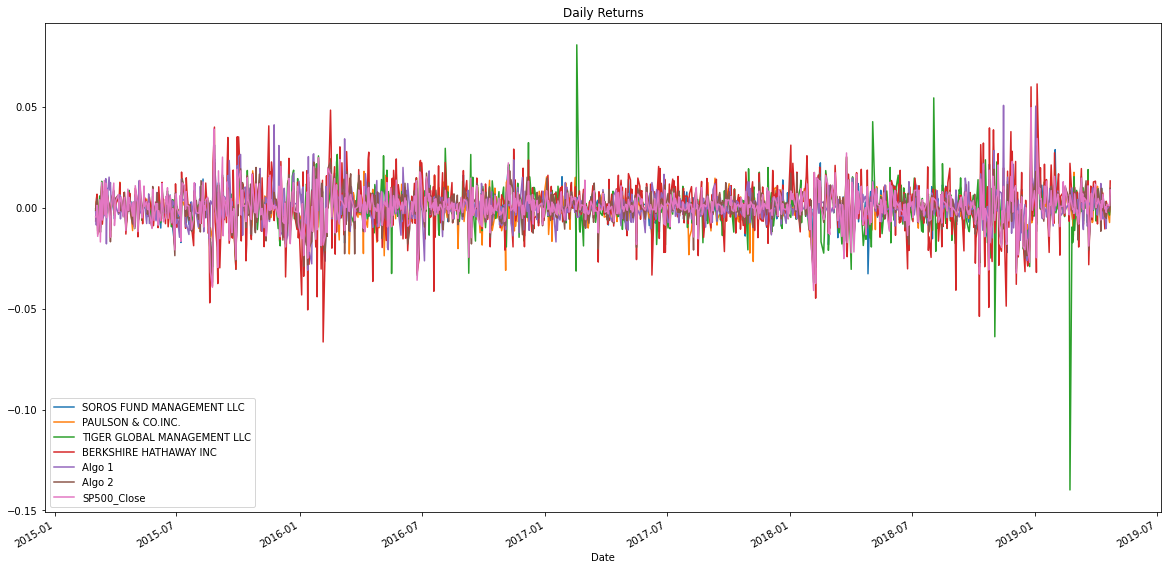

In [216]:
# Plot daily returns of all portfolios
combined_daily_returns.plot(title = "Daily Returns", figsize=(20,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

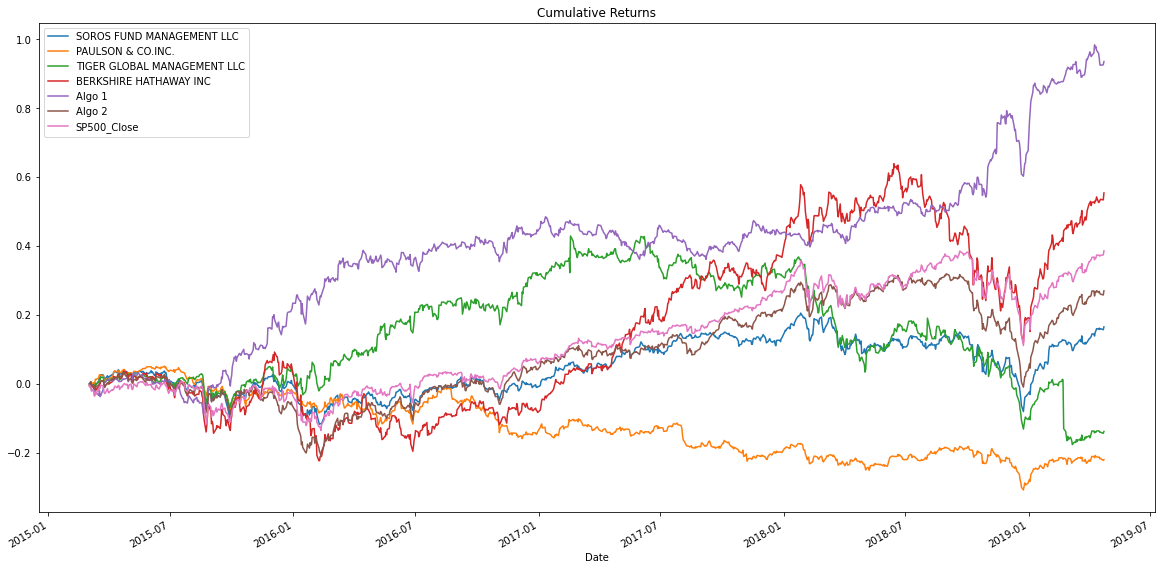

In [217]:
# Calculate cumulative returns of all portfolios
combined_cum_return = (1+combined_returns).cumprod()-1
# Plot cumulative returns
combined_cum_return.plot(title = "Cumulative Returns", figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Returns - Box Plot'}>

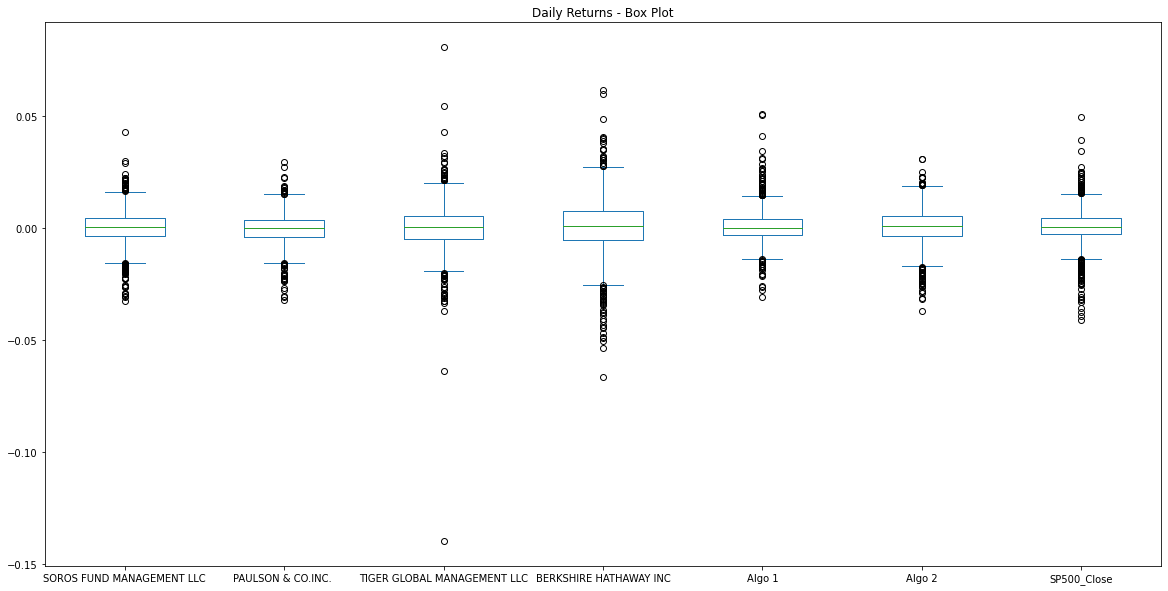

In [218]:
# Box plot to visually show risk
combined_daily_returns.plot(kind='box', legend =True, title = "Daily Returns - Box Plot", figsize=(20,10))

### Calculate Standard Deviations

In [219]:
# Calculate the daily standard deviations of all portfolios
daily_stdev = combined_daily_returns.std()
daily_stdev_df = pd.DataFrame(daily_stdev)
#print(daily_stdev[1])
daily_stdev.head(10)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500_Close                    0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [234]:
# Calculate  the daily standard deviation of S&P 500
SP500_stdev = combined_daily_returns['SP500_Close'].std()

# Determine which portfolios are riskier than the S&P 500
for index in daily_stdev_df[0]:
    if (index > SP500_stdev):
           print(index)
  
 
        
    
    

0.010893969618743005
0.012918618441883491


In [231]:
print(daily_stdev_df[])

KeyError: 'index'

### Calculate the Annualized Standard Deviation

In [101]:
# Calculate the annualized standard deviation (252 trading days)
annualized_stdev = daily_stdev*np.sqrt(252)
annualized_stdev


SOROS FUND MANAGEMENT LLC      0.000990
PAULSON & CO.INC.              0.000783
TIGER GLOBAL MANAGEMENT LLC    0.001884
BERKSHIRE HATHAWAY INC         0.002649
Algo 1                         0.000922
Algo 2                         0.001105
SP500_Close                    0.001161
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Variance of all portfolios'}, xlabel='Date'>

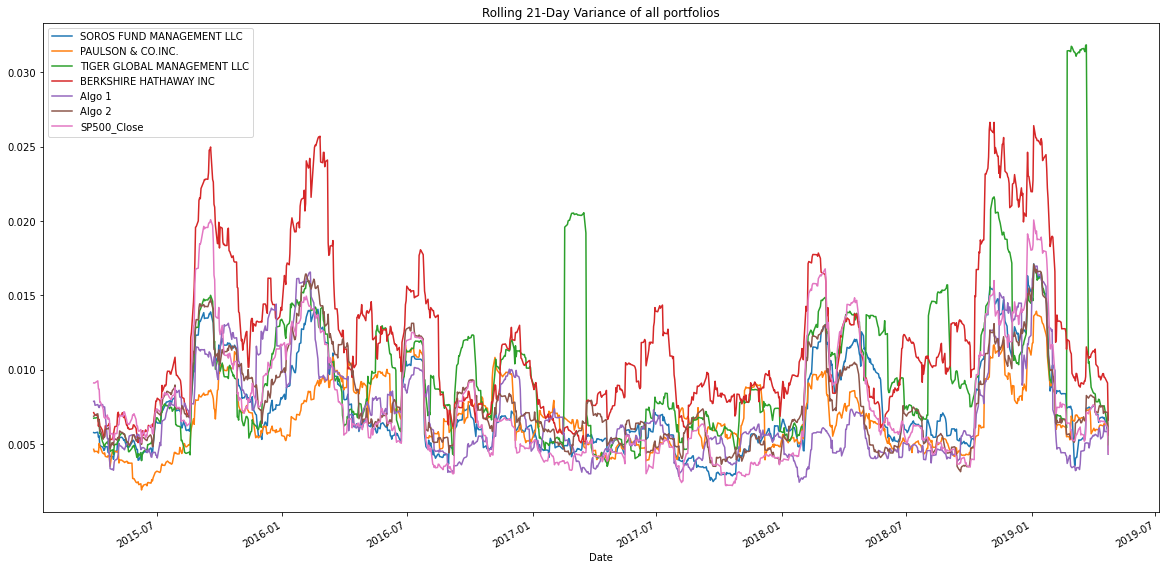

In [129]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling_std = combined_daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
combined_rolling_std.plot(figsize=(20, 10), title='Rolling 21-Day Variance of all portfolios')

### Calculate and plot the correlation

In [130]:
# Calculate the correlation
correlation_matrix = combined_daily_returns.corr()

# Display de correlation matrix
correlation_matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500_Close,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Berkshire Hathaway Inc Rolling Beta Trend'}, xlabel='Date'>

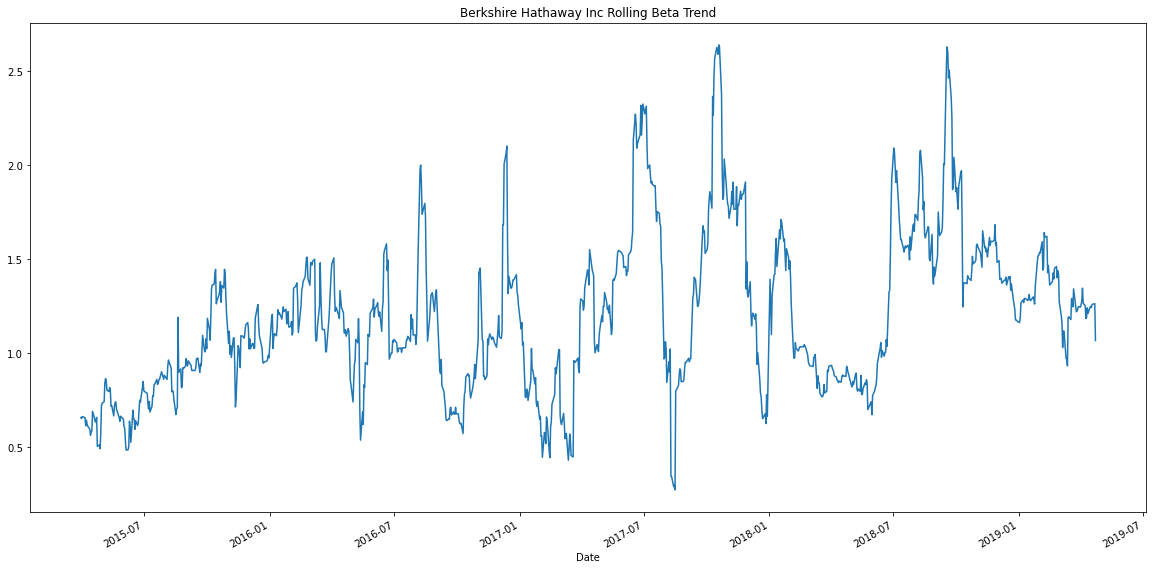

In [138]:
# Calculate covariance of a single portfolio
rolling_bhi_covariance = combined_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_daily_returns['SP500_Close'])

# Calculate variance of S&P 500
rolling_sp500_variance = combined_daily_returns['SP500_Close'].rolling(window=21).var()

# Computing beta
rolling_bhi_beta = rolling_bhi_covariance / rolling_sp500_variance

# Plot beta trend
rolling_bhi_beta.plot(figsize=(20, 10), title='Berkshire Hathaway Inc Rolling Beta Trend')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Berkshire Hathaway Inc EWM Beta Trend'}, xlabel='Date'>

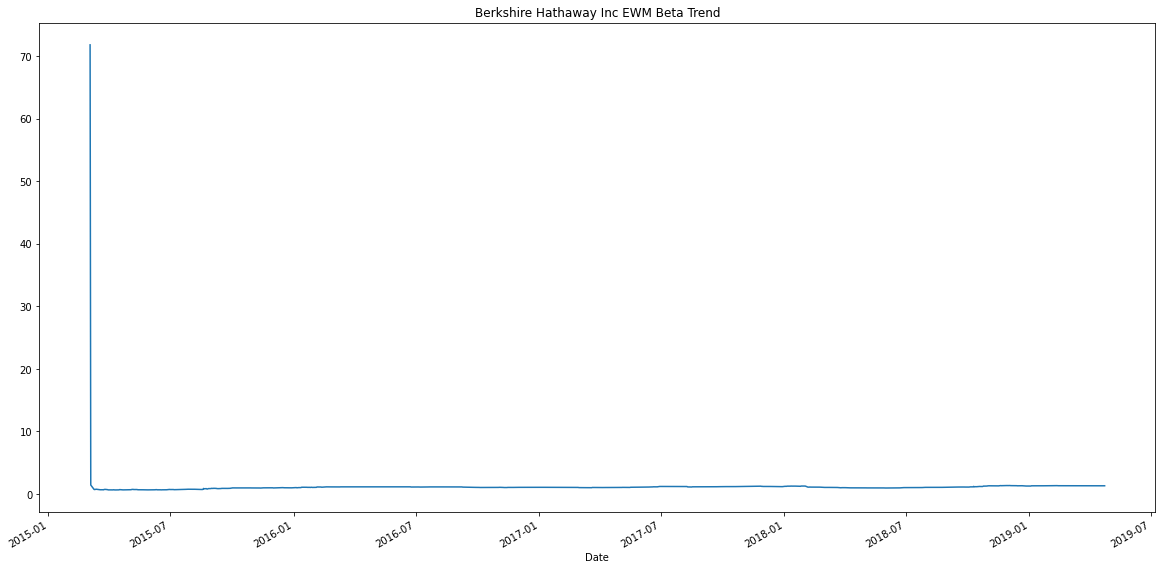

In [148]:
# Use `ewm` to calculate the rolling window
rolling_ewm_bhi_covariance = combined_daily_returns['BERKSHIRE HATHAWAY INC'].ewm(halflife=90).cov(combined_daily_returns['SP500_Close'])
rolling_ewm_sp500_variance = combined_daily_returns['SP500_Close'].ewm(halflife=90).var()
rolling_ewm_bhi_beta = rolling_ewm_bhi_covariance / rolling_ewm_sp500_variance

rolling_ewm_bhi_beta.plot(figsize=(20, 10), title='Berkshire Hathaway Inc EWM Beta Trend')


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [87]:
# Reading data from 1st stock
apple_history_path = Path("Resources/aapl_historical.csv")
apple_history = pd.read_csv(apple_history_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
apple_history.rename(columns={'NOCP':'Apple'},inplace=True)
apple_history.drop(columns=['Symbol'],inplace=True)
apple_history.head(5)

,Apple
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [89]:
# Reading data from 2nd stock
google_history_path = Path("Resources/goog_historical.csv")
google_history = pd.read_csv(google_history_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
google_history.rename(columns={'NOCP':'Google'},inplace=True)
google_history.drop(columns=['Symbol'],inplace=True)
google_history.head(5)

,Google
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [90]:
# Reading data from 3rd stock
costco_history_path = Path("Resources/cost_historical.csv")
costco_history = pd.read_csv(costco_history_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
costco_history.rename(columns={'NOCP':'Costco'},inplace=True)
costco_history.drop(columns=['Symbol'],inplace=True)
costco_history.head(5)

,Costco
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!

In [158]:
import requests
data =requests.get('http://api.worldbank.org/v2/country/all/indicator/NY.GDP.MKTP.CD?format=json')